# Project 2 Ames Housing Code

# Kaggle Project 2 Regression Challenge Rules
Predict the values for your target column in the test dataset and submit your predictions to Kaggle to see how your model does against unknown data.
    - **Note**: Kaggle expects to see your submissions in a specific format. Check the challenge's page to make sure you are formatting your CSVs correctly!
    - **You are limited to models you've learned in class**. In other words, you cannot use XGBoost, Neural Networks or any other advanced model for this project.

# Guidelines

Generate your regression model using the training data. We expect that within this process, you'll be making use of:
    - train-test split
    - cross-validation / grid searching for hyperparameters
    - strong exploratory data analysis to question correlation and relationship across predictive variables
    - code that reproducibly and consistently applies feature transformation (such as the preprocessing library)


Evaluate your models!
    - consider your evaluation metrics
    - consider your baseline score
    - how can your model be used for inference?
    - why do you believe your model will generalize to new data?

# Imports

In [1]:
#the usual suspects
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

%matplotlib inline

#statsmodel
import statsmodels.api as sm

#scipy
from scipy.stats import ttest_ind

#sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Read Data

In [2]:
pwd

'/Users/tringuyen/Desktop/ga/Projects/Project_2_Ames_Housing_Tri/code'

In [3]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

# Explore Data

In [4]:
train.shape, test.shape

((2051, 81), (878, 80))

In [5]:
train['SalePrice'][:3]

0    130500
1    220000
2    109000
Name: SalePrice, dtype: int64

In [6]:
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [7]:
train.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


In [8]:
corr = train.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice       1.000000
Overall Qual    0.800207
Gr Liv Area     0.697038
Garage Area     0.650270
Garage Cars     0.648220
Name: SalePrice, dtype: float64 

MS SubClass      -0.087335
Overall Cond     -0.097019
Kitchen AbvGr    -0.125444
Enclosed Porch   -0.135656
PID              -0.255052
Name: SalePrice, dtype: float64


In [9]:
train.SalePrice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [10]:
quality_pivot = train.pivot_table(index='Overall Qual',
                  values='SalePrice', aggfunc=np.median)

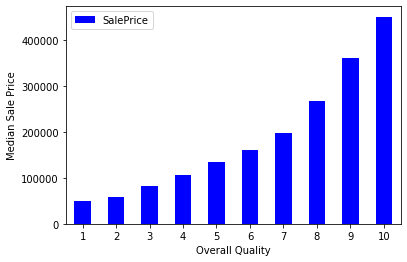

In [11]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [12]:
train['Overall Qual'].unique()

array([ 6,  7,  5,  8, 10,  4,  9,  3,  2,  1])

In [13]:
train['Overall Qual'].unique()

array([ 6,  7,  5,  8, 10,  4,  9,  3,  2,  1])

In [14]:
liv_pivot = train.pivot_table(index='Gr Liv Area',
                  values='SalePrice', aggfunc=np.median)

In [15]:
target = np.log(train['SalePrice'])

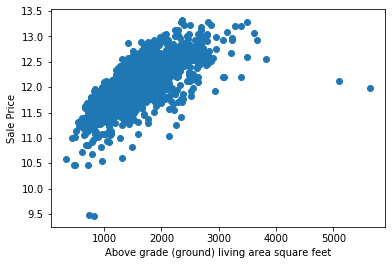

In [16]:
plt.scatter(x=train['Gr Liv Area'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

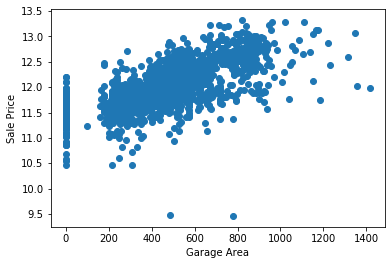

In [17]:
plt.scatter(x=train['Garage Area'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [18]:
train = train[train['Garage Area'] < 1200]

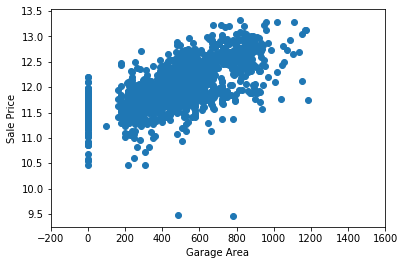

In [19]:
plt.scatter(x=train['Garage Area'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

# Model Building

In [20]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# First Model

In [21]:
X = train[['Overall Qual', 'Gr Liv Area']]
y = np.log(train['SalePrice'])

In [22]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(1369, 2) (1369,)
(675, 2) (675,)


In [23]:
lr = linear_model.LinearRegression()

In [24]:
type(lr)

sklearn.linear_model.base.LinearRegression

In [25]:
model = lr.fit(X_train, y_train)
predictions = lr.predict(X_test)


In [26]:
# round to two decimals for better readiability
print ("R^2 is: \n", round(model.score(X_test, y_test),2))
print ('RMSE is: \n', round(mean_squared_error(y_test, predictions),2))

R^2 is: 
 0.78
RMSE is: 
 0.04


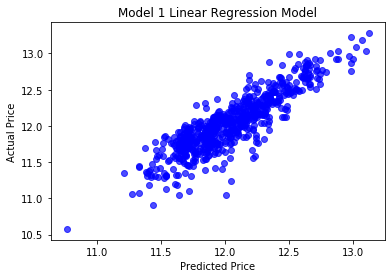

In [27]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model 1 Linear Regression Model')

plt.savefig('../images/Model 1 Linear Regression Model.png')
plt.show()



Score: 0.78


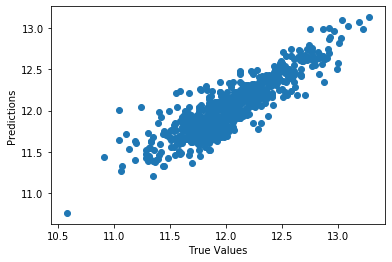

In [28]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print ("Score:", round(model.score(X_test, y_test),2))

## Submission Prep

In [29]:
final_predictions = np.exp(predictions)


(array([ 16., 192., 206., 136.,  61.,  39.,  12.,   4.,   6.,   3.]),
 array([ 47401.45426563,  92783.19980208, 138164.94533853, 183546.69087499,
        228928.43641144, 274310.18194789, 319691.92748434, 365073.6730208 ,
        410455.41855725, 455837.1640937 , 501218.90963016]),
 <a list of 10 Patch objects>)

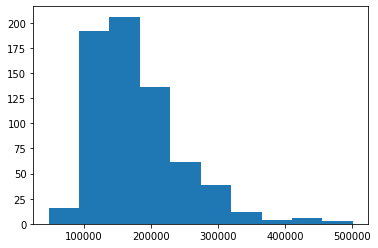

In [30]:
plt.hist(final_predictions)

# Submission

In [31]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [32]:
feats = test[['Overall Qual','Gr Liv Area']]

In [33]:
predictions = model.predict(feats)

In [34]:
final_predictions = np.exp(predictions)

In [35]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [12.12879869 11.96010656 12.1834945  11.67032964 11.97390292] 

Final predictions are: 
 [185127.24719864 156389.74852015 195534.96581013 117046.85885925
 158562.31004187]


In [36]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,2658,185127.247199
1,2718,156389.748520
2,2414,195534.965810
3,1989,117046.858859
4,625,158562.310042


In [37]:
submission.to_csv('submission1.csv', index=False)

# Model 2

### Converting to Dummy Data

In [38]:
train['Heating'] = pd.get_dummies(train['Heating'])
train['Heating QC'] = pd.get_dummies(train['Heating QC'])
train['Central Air'] = pd.get_dummies(train['Central Air'])
train['Kitchen Qual'] = pd.get_dummies(train['Kitchen Qual'])
train['Garage Qual'] = pd.get_dummies(train['Garage Qual'])

test['Heating'] = pd.get_dummies(train['Heating'])
test['Heating QC'] = pd.get_dummies(train['Heating QC'])
test['Central Air'] = pd.get_dummies(train['Central Air'])
test['Kitchen Qual'] = pd.get_dummies(train['Kitchen Qual'])
test['Garage Qual'] = pd.get_dummies(train['Garage Qual'])

In [39]:
print(train.shape)
print(test.shape)

(2044, 81)
(878, 80)


### Checking for Null values in dummified variables

In [40]:
train[['Heating','Heating QC','Central Air','Kitchen Qual','Garage Qual']].isnull().sum()

Heating         0
Heating QC      0
Central Air     0
Kitchen Qual    0
Garage Qual     0
dtype: int64

In [41]:
test[['Heating','Heating QC','Central Air','Kitchen Qual','Garage Qual']].isnull().sum()

Heating         2
Heating QC      2
Central Air     2
Kitchen Qual    2
Garage Qual     2
dtype: int64

### Fill NaN values cells

In [42]:
test.fillna(0,inplace=True)

### Adding 8 More Features

In [43]:
X = train[['Overall Qual', 
           'Gr Liv Area',
           'Garage Area',
           'Overall Cond',
           'Garage Cars',
           'Bedroom AbvGr',
           'Heating',
           'Heating QC',
           'Central Air',
           'Kitchen Qual',
           'Garage Qual']]
y = np.log(train['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

lr2 = linear_model.LinearRegression()

model2 = lr2.fit(X_train, y_train)
predictions2 = lr2.predict(X_test)

In [44]:
print ("R^2 is: \n", round(model2.score(X_test, y_test),2))
print ('RMSE is: \n', round(mean_squared_error(y_test, predictions2),2))

R^2 is: 
 0.84
RMSE is: 
 0.03


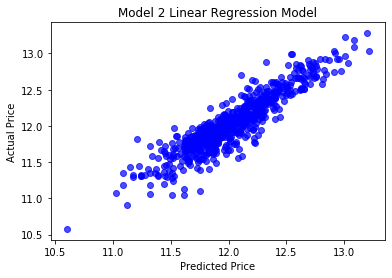

In [45]:
actual_values = y_test
plt.scatter(predictions2, actual_values, alpha=.7,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model 2 Linear Regression Model')

plt.savefig('../images/Model 2 Linear Regression Model.png')

plt.show()

Score: 1.0


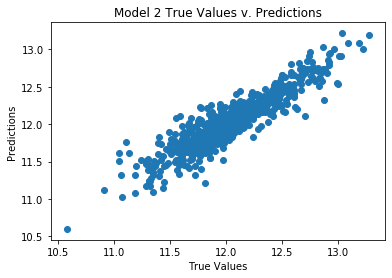

In [46]:
plt.scatter(y_test, predictions2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Model 2 True Values v. Predictions')

print ("Score:", round(model2.score(X_test, y_test),))

# Model 2 Submission

In [47]:
submission2 = pd.DataFrame()
submission2['Id'] = test.Id

In [48]:
feats2 = test[['Overall Qual', 
           'Gr Liv Area',
           'Garage Area',
           'Overall Cond',
           'Garage Cars',
           'Bedroom AbvGr',
           'Heating',
           'Heating QC',
           'Central Air',
           'Kitchen Qual',
           'Garage Qual']]

In [49]:
predictions2 = model2.predict(feats2)

In [50]:
final_predictions2 = np.exp(predictions2)

In [51]:
print ("Original predictions are: \n", predictions2[:5], "\n")
print ("Final predictions are: \n", final_predictions2[:5])

Original predictions are: 
 [11.70533247 11.54816702 11.77028357 11.41737913 11.62842039] 

Final predictions are: 
 [121216.37761665 103586.98998941 129350.82509904  90887.62485818
 112242.88134058]


In [52]:
submission2['SalePrice'] = final_predictions2
submission2.head()

,Id,SalePrice
0,2658,121216.377617
1,2718,103586.989989
2,2414,129350.825099
3,1989,90887.624858
4,625,112242.881341


In [53]:
submission2.to_csv('submission2.csv', index=False)

# $r^2$ Scores Comparison

| Model | $R^2$ | RMSE |
|-------|-------|------|
| 1     | 0.78  | 0.04 |
| 2     | 0.84  | 0.03 |

Model 2 is an improvement over model 1 after adding in more features with the $R^2$ and RMSE score being 0.06 more and 0.01 less respectively. This illustrates that model 2 𝑅2 value of 0.84 means that 84% of the variability in the data are explained by our model, relative to a model with no predictors.

# Ridge Regression Attempt

In [54]:
X = train[['Overall Qual', 
           'Gr Liv Area',
           'Garage Area',
           'Overall Cond',
           'Garage Cars',
           'Bedroom AbvGr',
           'Heating',
           'Heating QC',
           'Central Air',
           'Kitchen Qual',
           'Garage Qual']]
y = np.log(train['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

rr = linear_model.Ridge()
model_r = rr.fit(X_train, y_train)
predictions_r = rr.predict(X_test)

print ("R^2 is: \n", round(model_r.score(X_test, y_test),2))
print ('RMSE is: \n', round(mean_squared_error(y_test, predictions_r),2))

(1369, 11) (1369,)
(675, 11) (675,)
R^2 is: 
 0.84
RMSE is: 
 0.03


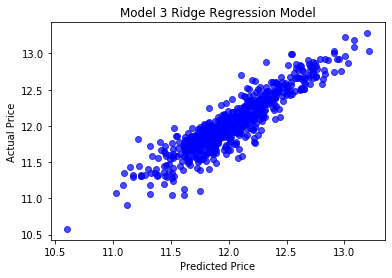

In [55]:
actual_values = y_test
plt.scatter(predictions_r, actual_values, alpha=.7,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model 3 Ridge Regression Model')

plt.savefig('../images/Model 3 Ridge Regression Model.png')

plt.show()

Score: 0.8394292056435746


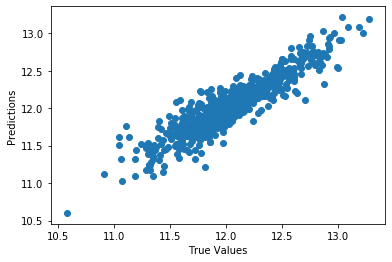

In [56]:
plt.scatter(y_test, predictions_r)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print ("Score:", model_r.score(X_test, y_test))

## Lasso Regression Attempt

In [57]:
X = train[['Overall Qual', 
           'Gr Liv Area',
           'Garage Area',
           'Overall Cond',
           'Garage Cars',
           'Bedroom AbvGr',
           'Heating',
           'Heating QC',
           'Central Air',
           'Kitchen Qual',
           'Garage Qual']]
y = np.log(train['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

ll = linear_model.Lasso()
model_ll = ll.fit(X_train, y_train)
predictions_ll = ll.predict(X_test)

print ("R^2 is: \n", round(model_r.score(X_test, y_test),2))
print ('RMSE is: \n', round(mean_squared_error(y_test, predictions_r),2))

(1369, 11) (1369,)
(675, 11) (675,)
R^2 is: 
 0.84
RMSE is: 
 0.03


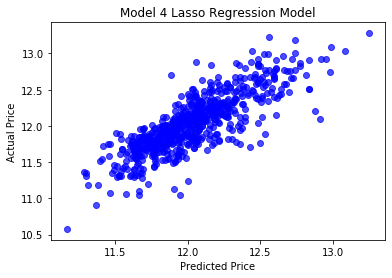

In [58]:
actual_values = y_test
plt.scatter(predictions_ll, actual_values, alpha=.7,
            color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model 4 Lasso Regression Model')
plt.savefig('../images/Model 4 Lasso Regression Model.png')
plt.show()

Score: 0.8394292056435746


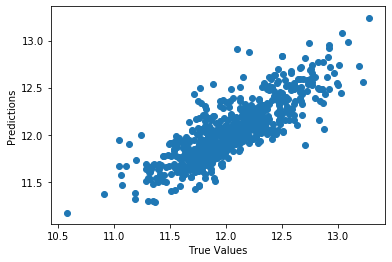

In [59]:
plt.scatter(y_test, predictions_ll)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print ("Score:", model_r.score(X_test, y_test))

# Comparing $R^2$ Scores of New and Old models

| Model | $R^2$ | RMSE |
|-------|-------|------|
| 1     | 0.78  | 0.04 |
| 2     | 0.84  | 0.03 |
| 3     | 0.84  | 0.03 |
| 4     | 0.84  | 0.03 |

Utilizing the ridge and lasso regression models for model 3 and 4 respectively, the $r^2$ score and RMSE remained the same. This may hint more feature engineering may be needed or not. Either way, adding in more features such as housing conditions does affect the sales price for the ames housing.